In [14]:
# Step 1: Import the dependencies

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [15]:
# Step 2: Get the data and store it to a variable

df = pd.read_csv("resources/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Step 3: Assign your X (features) and y (target), give the target and features a name

target = df["Outcome"]
target_names = ["negative", "positive"]

data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
# Step 4: Train Test Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [18]:
# Step 5: Employ KNN, looping through k values to see which has highest accuracy

train_scores, test_scores = [], []

# Begin for loop using odd number patterning
for k in range(1,40,2):
    
    # Call the knn classifier with k each iteration
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model using training data
    knn.fit(X_train, y_train)
    
    # get the training score
    train_score = knn.score(X_train, y_train)
    
    # get the testing score
    test_score = knn.score(X_test, y_test)
    
    # through the scores into the respective array
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"k: {k}. Train / Test: {train_score:.3f}/{test_score:.3f}")

k: 1. Train / Test: 1.000/0.667
k: 3. Train / Test: 0.847/0.641
k: 5. Train / Test: 0.807/0.656
k: 7. Train / Test: 0.799/0.682
k: 9. Train / Test: 0.797/0.714
k: 11. Train / Test: 0.795/0.693
k: 13. Train / Test: 0.790/0.740
k: 15. Train / Test: 0.786/0.740
k: 17. Train / Test: 0.786/0.714
k: 19. Train / Test: 0.781/0.714
k: 21. Train / Test: 0.781/0.703
k: 23. Train / Test: 0.783/0.693
k: 25. Train / Test: 0.773/0.703
k: 27. Train / Test: 0.773/0.708
k: 29. Train / Test: 0.776/0.714
k: 31. Train / Test: 0.766/0.719
k: 33. Train / Test: 0.764/0.724
k: 35. Train / Test: 0.759/0.729
k: 37. Train / Test: 0.755/0.729
k: 39. Train / Test: 0.755/0.724


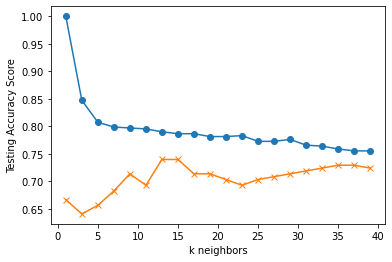

In [19]:
# Step 6: Plot the results

plt.plot(range(1,40,2), train_scores, marker='o')
plt.plot(range(1,40,2), test_scores, marker='x')
plt.xlabel('k neighbors')
plt.ylabel('Testing Accuracy Score')
plt.show()

In [20]:
# NOTE: It is best to use standardscaler to scale the data because example: pregnancies is of much lower
# values compared to glucose

In [21]:
# Step 7: looks like k=13 or k=15 is best possible choice. We can test it out by scoring it
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Accuracy: %.3f' % knn.score(X_test, y_test))

k=13 Test Accuracy: 0.740
